<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

14:04:17 INFO << load arm CSV.
14:04:17 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 4)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 4)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:42<00:00, 14.13s/it]


14:05:21 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
14:05:21 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


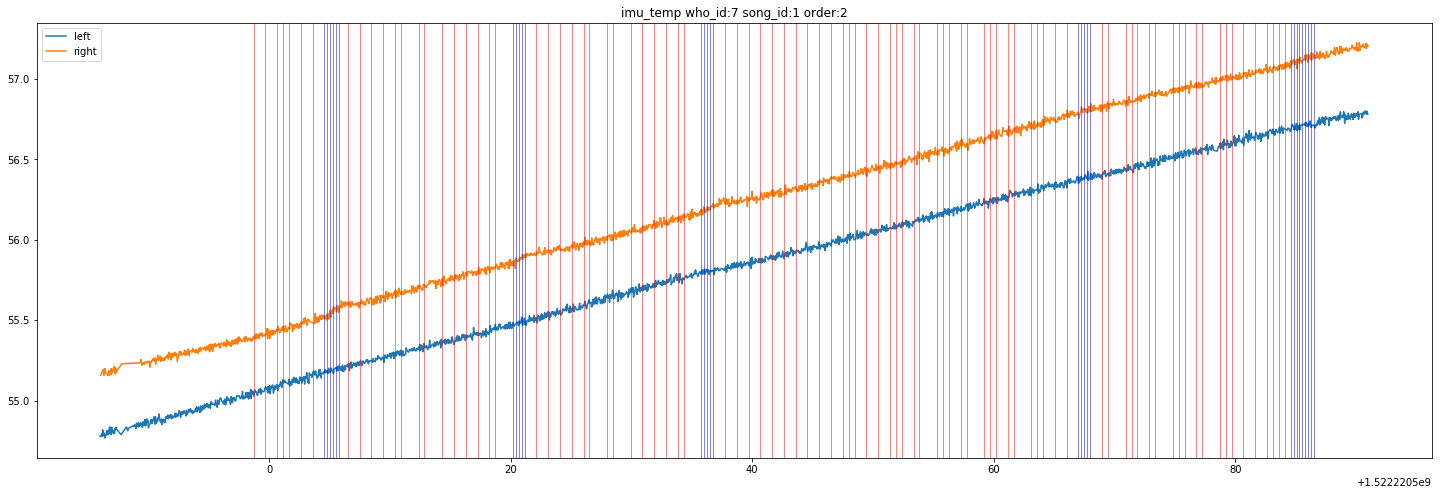

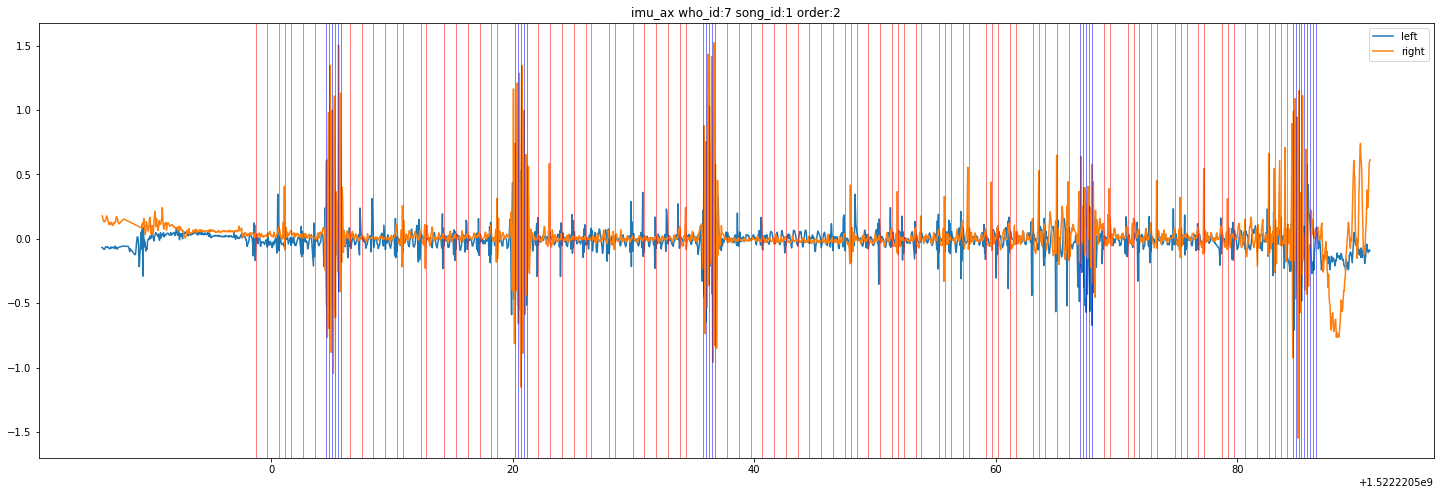

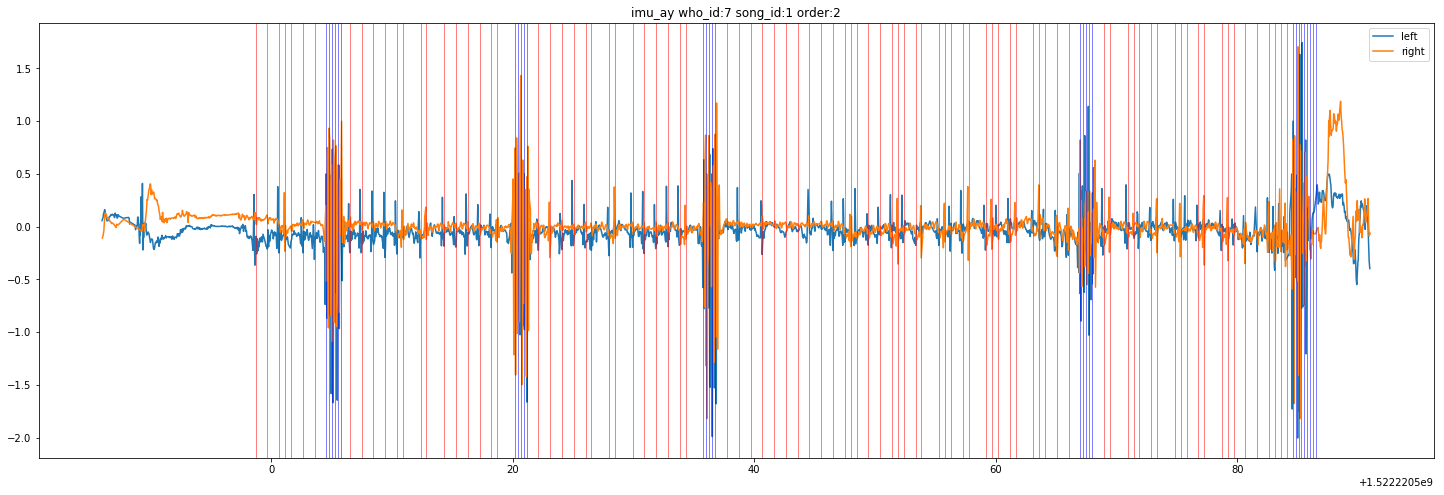

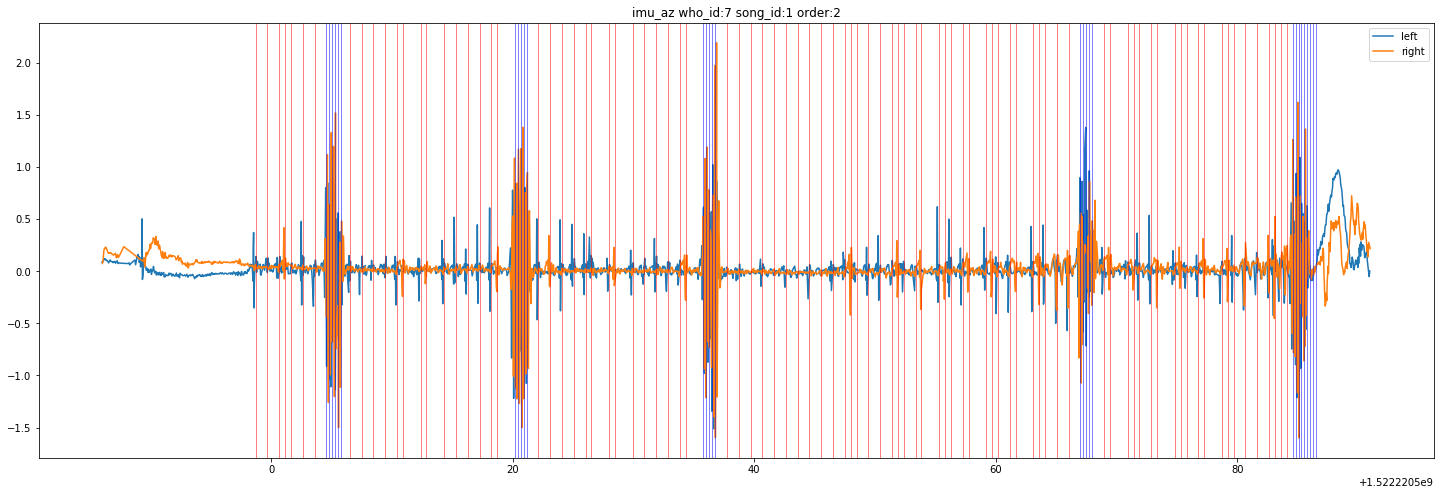

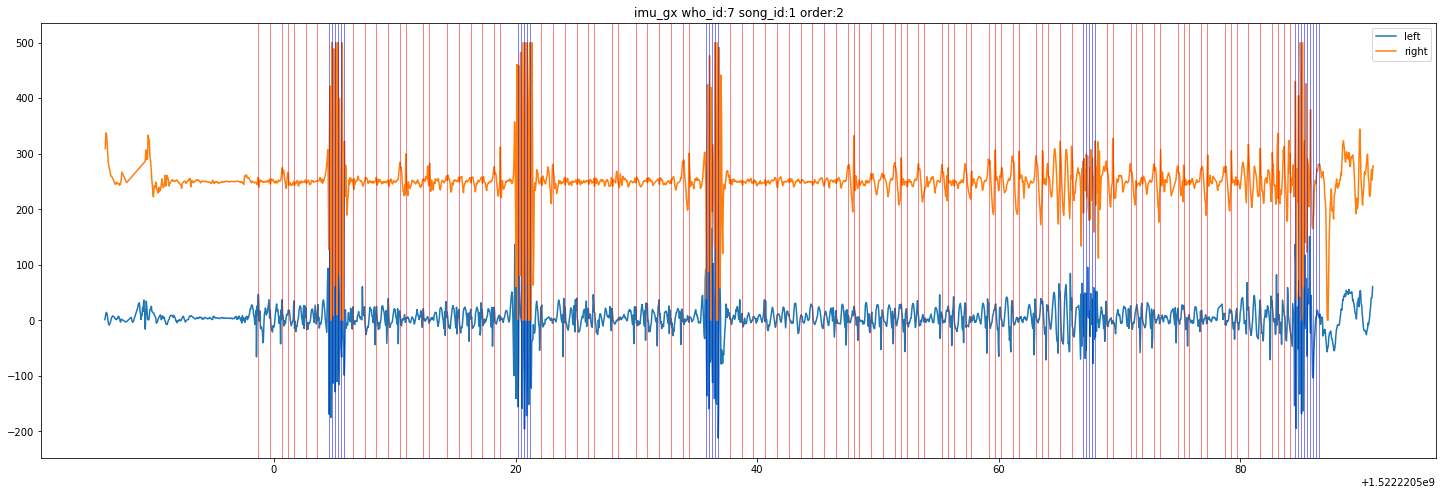

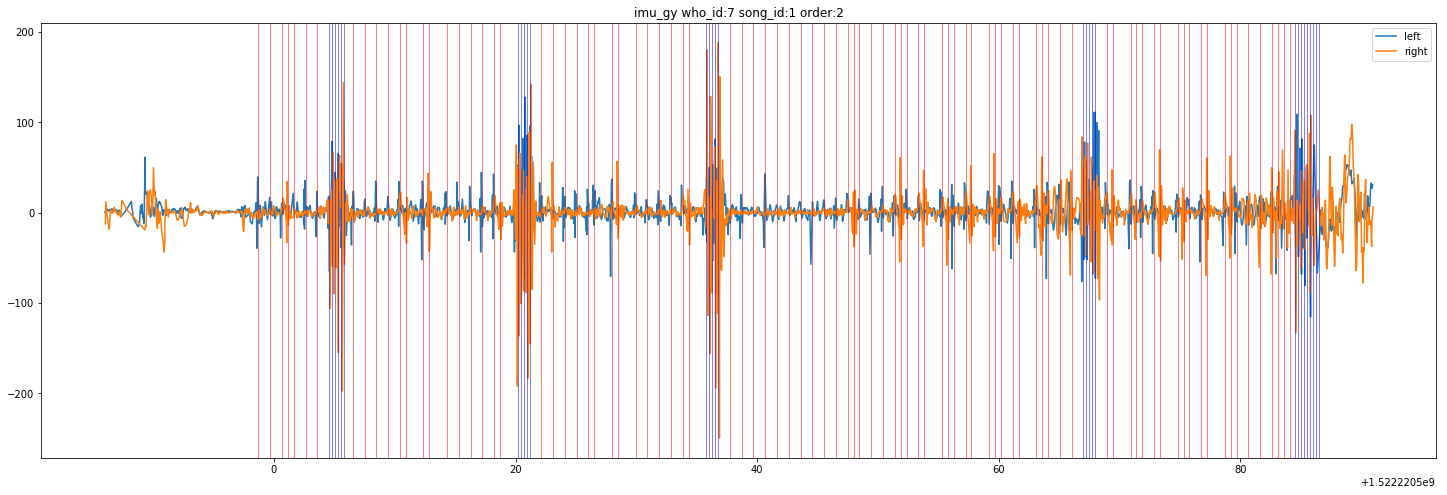

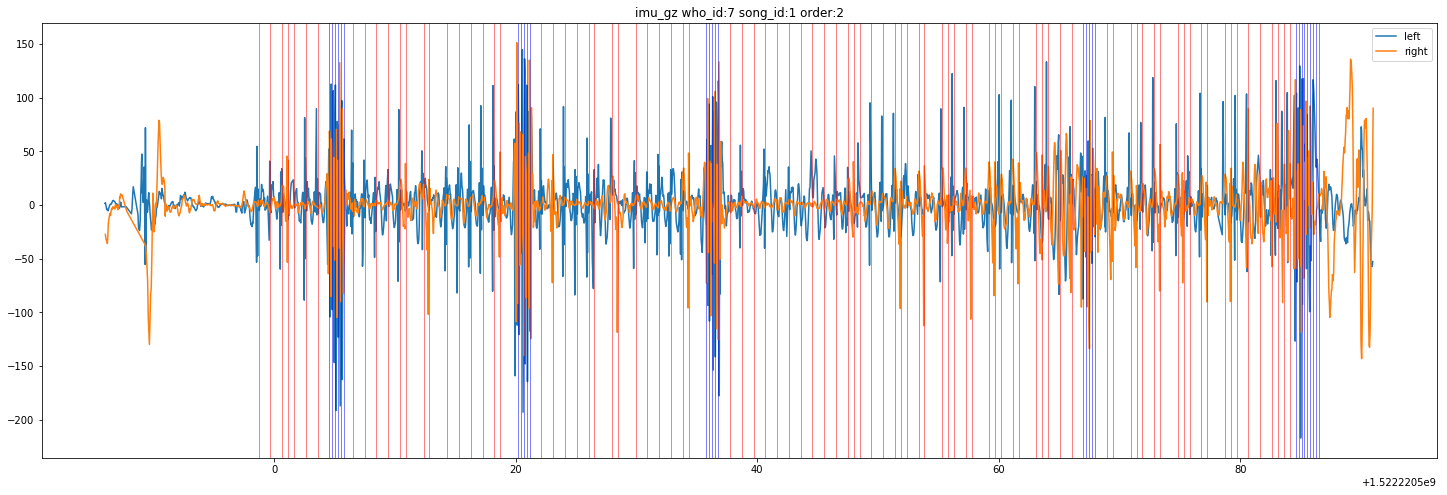

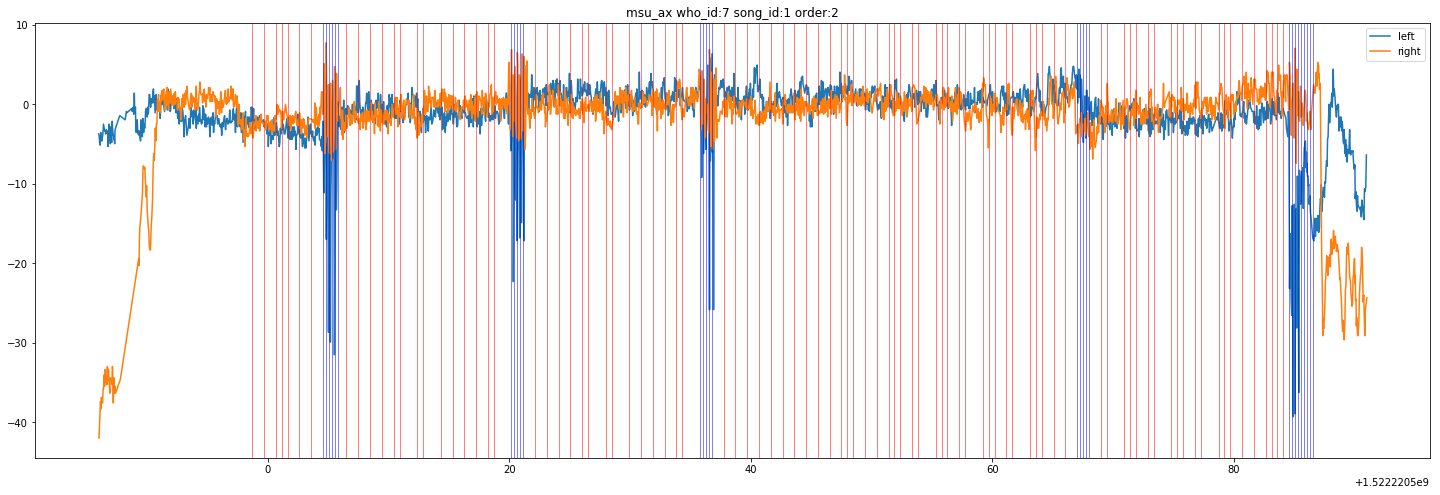

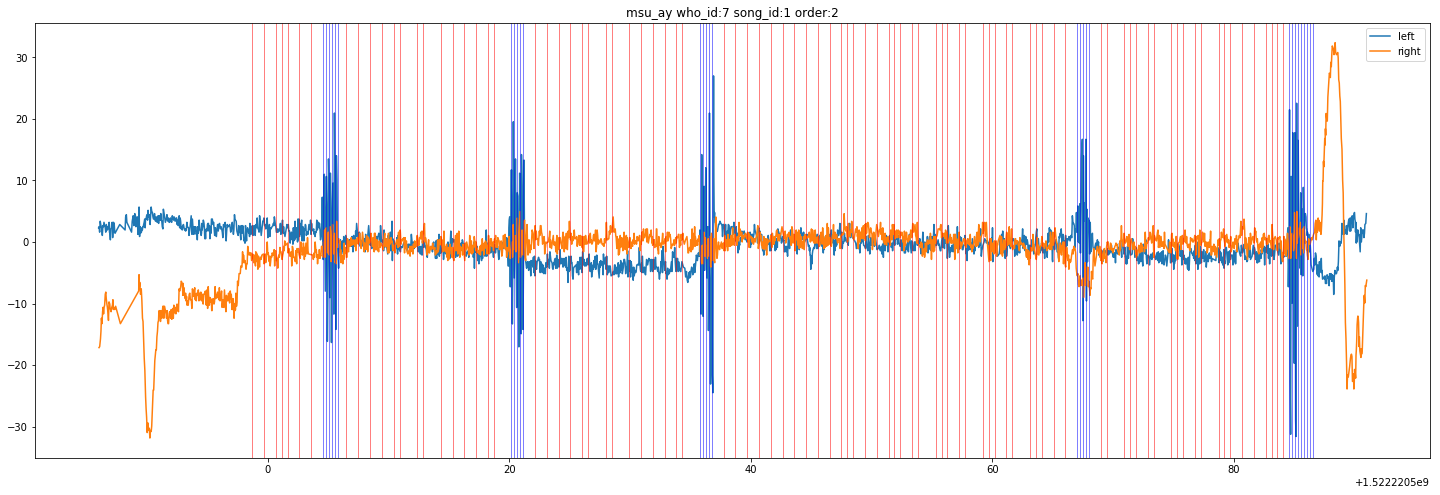

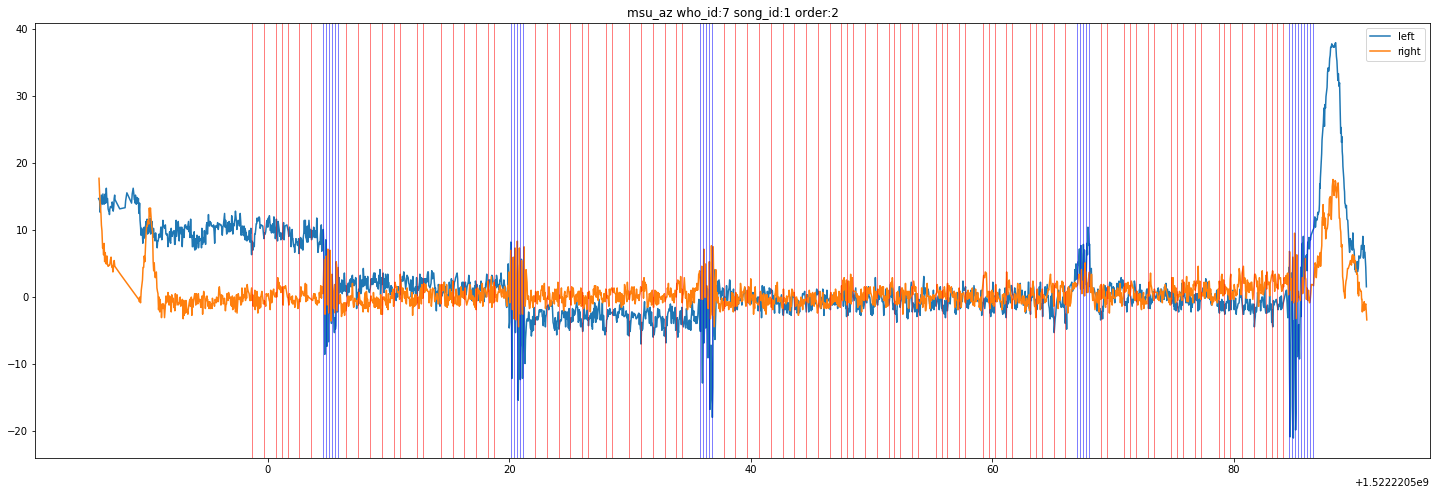

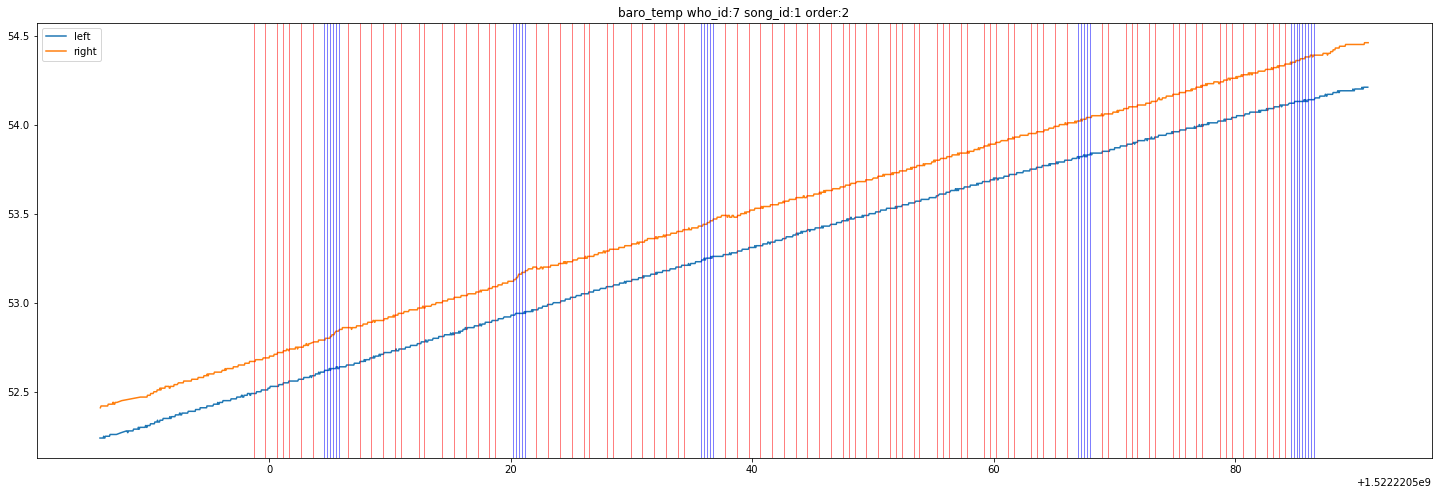

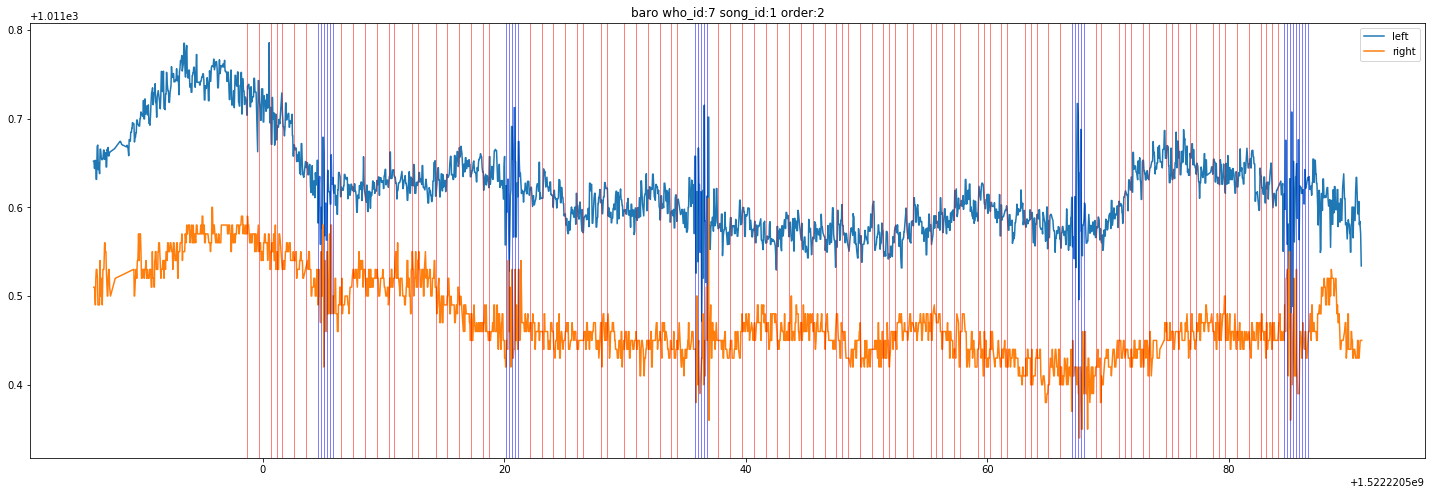

In [6]:
pfs[1].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.307712,1.862553e-05,0.511000,38.132236,0.801031,49.407500,0.094705,1454.868437,0.307712,38.132236,...,0.250000,0.500000,0.250000,0.500000,-0.746030,-0.942679,0.756539,-0.867695,-0.544607,0.064650
1,0.310438,1.199181e-04,0.521000,35.521433,2.031264,46.928333,0.096492,1263.803467,0.306826,35.457932,...,0.250000,0.250000,0.250000,0.250000,-0.591351,-0.770244,0.959555,-0.460062,0.416048,-0.921811
2,0.320866,7.592682e-05,0.541667,31.978426,7.431280,46.704667,0.103031,1030.051007,0.318121,32.162874,...,0.250000,0.250000,0.250000,0.250000,-0.749458,0.940635,-0.897475,-0.662524,0.623320,-0.991558
3,0.325013,4.287884e-05,0.536333,29.841449,2.717314,37.905000,0.105676,893.229364,0.327416,29.470875,...,0.250000,0.250000,0.250000,0.250000,-0.966498,0.767507,-0.767982,0.749651,-0.485247,-0.929667
4,0.310805,1.312503e-05,0.517000,30.789261,0.432182,45.158000,0.096613,948.410762,0.310805,30.789261,...,0.333333,0.333333,0.333333,0.333333,0.948703,0.212387,-0.107464,-0.998349,-0.972726,0.957795
5,0.321361,1.128909e-05,0.538500,21.381749,9.572856,31.871000,0.103284,466.752046,0.321361,21.381749,...,0.500000,0.250000,0.500000,0.250000,-0.888838,0.855768,-0.928668,0.567767,-0.272094,-0.835727
6,0.310666,1.274971e-04,0.512667,11.120429,0.071148,17.138333,0.096641,123.735096,0.311432,11.301628,...,0.333333,0.333333,0.333333,0.333333,0.423396,-0.981035,-0.590968,0.990698,-0.919025,-0.856835
7,0.267362,5.679842e-05,0.427000,6.845829,0.869616,10.577333,0.071539,47.734989,0.263312,6.444855,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000
8,0.206871,4.334670e-04,0.323000,15.571846,5.539404,22.705000,0.043229,248.021794,0.213890,15.366697,...,0.666667,0.333333,0.333333,0.333333,-0.992960,0.817646,-0.880083,0.181929,0.979064,0.378274
9,0.178923,3.797283e-04,0.273667,24.887448,8.453060,31.926667,0.032393,627.838113,0.188587,25.999748,...,0.333333,0.333333,0.333333,0.333333,0.998665,-0.469453,-0.514434,-0.991628,-0.850857,0.911577


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[ 0.56012627 -0.245977    0.7315173  ... -0.980637   -0.98067443
  -0.31710687]
 [ 0.57145119 -0.24220484  0.76026085 ... -0.49176226  0.23469116
  -1.57509027]
 [ 0.61476626 -0.24384308  0.81966418 ... -0.73457508  0.49692092
  -1.66403512]
 ...
 [ 0.28245879 -0.2460343   0.20694753 ... -1.1290397  -1.50612037
   0.76744779]
 [ 0.43884675 -0.23520431  0.3848701  ...  1.25929204 -1.556812
  -1.67480083]
 [ 0.56607798 -0.24638214  0.52552186 ... -1.13476437 -0.66285121
  -0.13287439]]


100%|██████████| 361/361 [00:28<00:00, 12.77it/s]

let's go centroid=50, C=25.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:28<00:00, 12.78it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.2        0.8       ]]


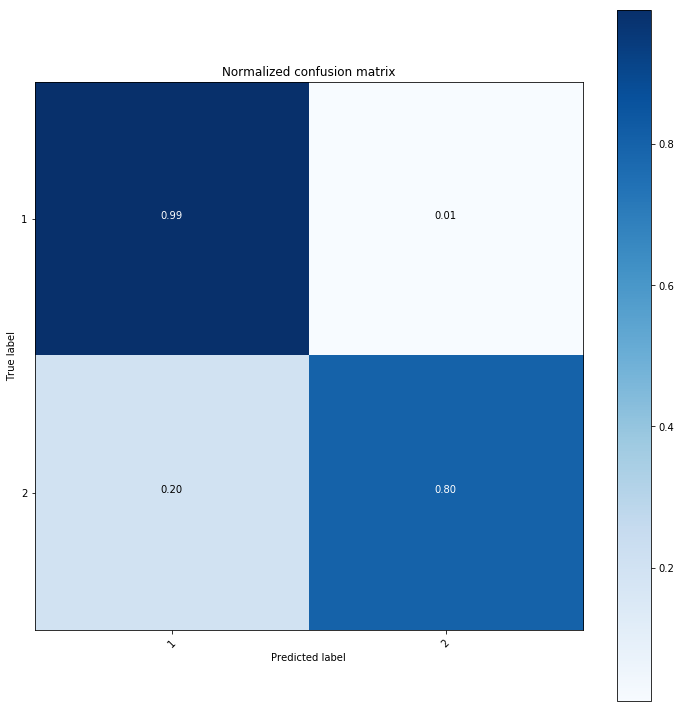

predicting 2 performance


100%|██████████| 361/361 [00:28<00:00, 12.83it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.26666667 0.73333333]]


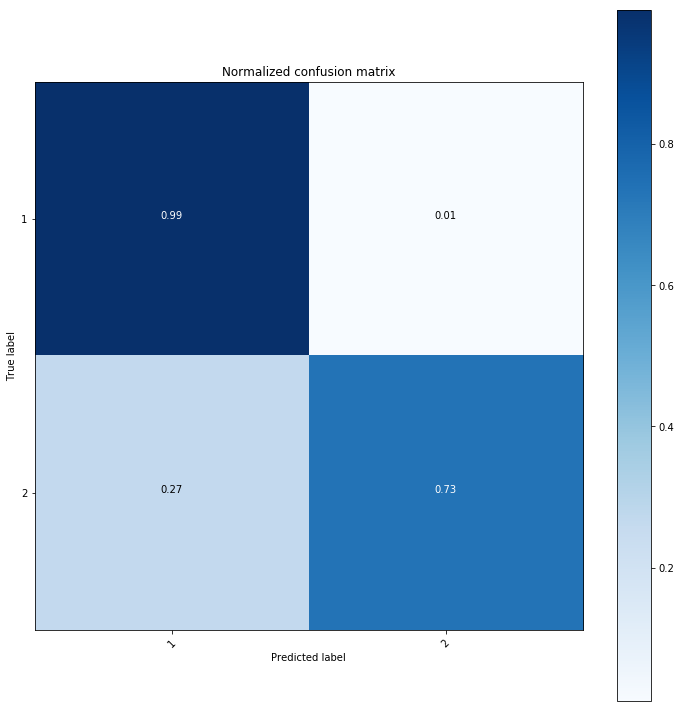

predicting 3 performance


100%|██████████| 361/361 [00:28<00:00, 12.76it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


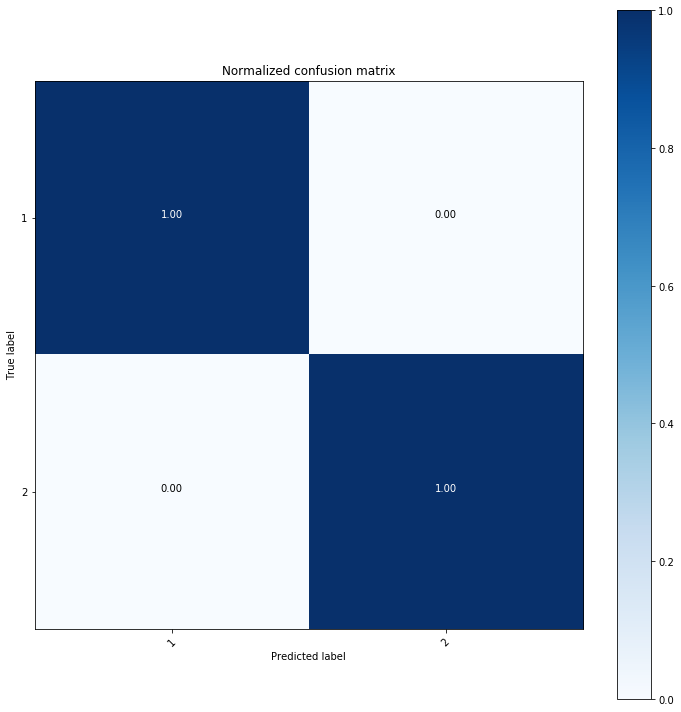

[[ 0.56012627 -0.245977    0.7315173  ... -0.980637   -0.98067443
  -0.31710687]
 [ 0.57145119 -0.24220484  0.76026085 ... -0.49176226  0.23469116
  -1.57509027]
 [ 0.61476626 -0.24384308  0.81966418 ... -0.73457508  0.49692092
  -1.66403512]
 ...
 [ 0.28245879 -0.2460343   0.20694753 ... -1.1290397  -1.50612037
   0.76744779]
 [ 0.43884675 -0.23520431  0.3848701  ...  1.25929204 -1.556812
  -1.67480083]
 [ 0.56607798 -0.24638214  0.52552186 ... -1.13476437 -0.66285121
  -0.13287439]]


100%|██████████| 361/361 [00:28<00:00, 12.76it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:28<00:00, 12.78it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.2        0.8       ]]


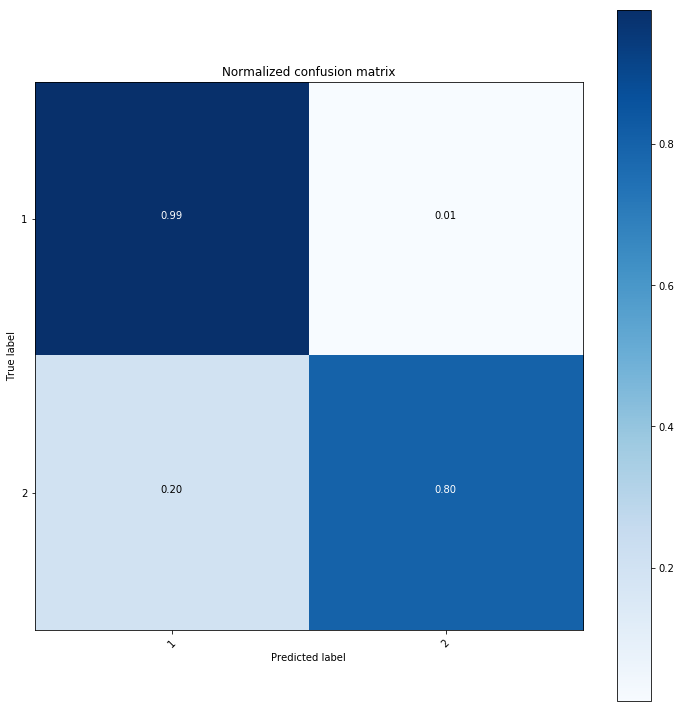

predicting 2 performance


100%|██████████| 361/361 [00:28<00:00, 12.82it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.26666667 0.73333333]]


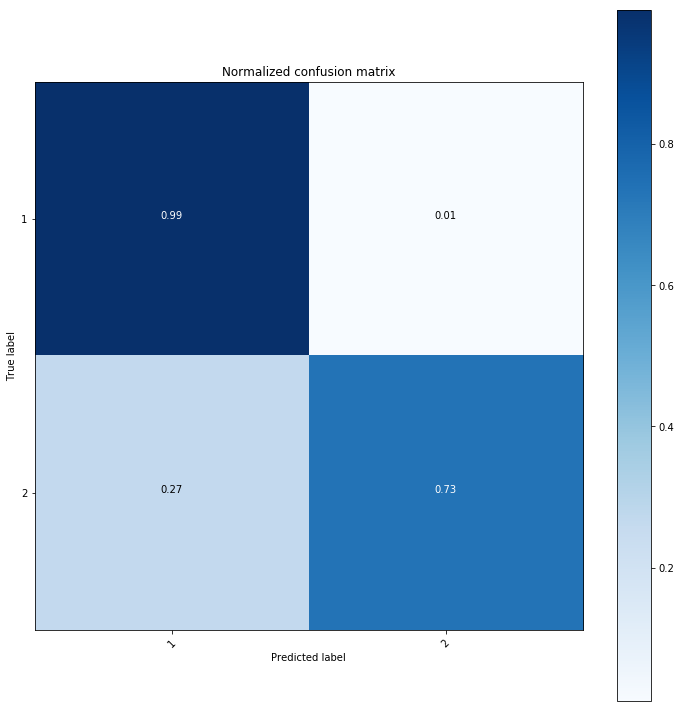

predicting 3 performance


100%|██████████| 361/361 [00:28<00:00, 12.75it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


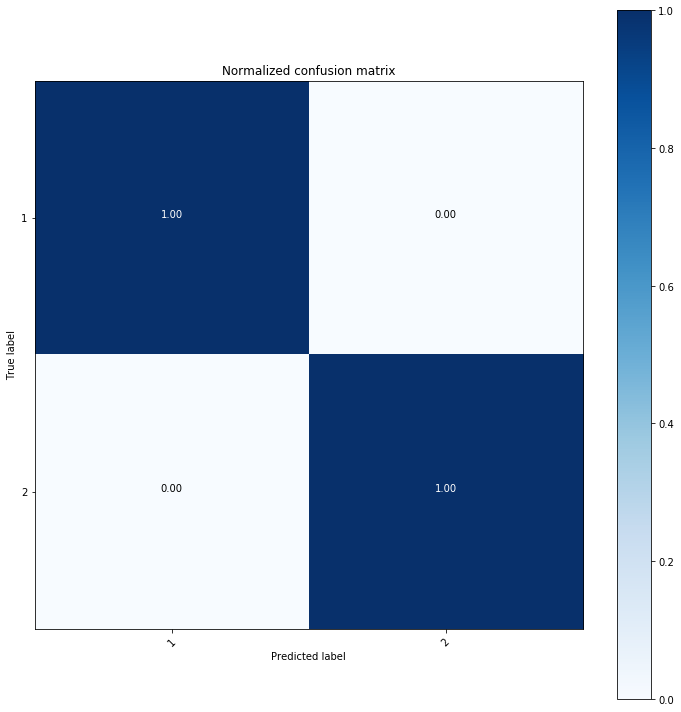

In [9]:
for k in [50]:
    for C in [25, 100]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)